No**.1** <br>
Nama : Muhamad Fikri <br>
Nim : I.2111733

In [46]:
# No. 2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np

In [47]:
# No. 3
# Load CIFAR100 dataset

(x_train, x_label), (y_test, y_label) = cifar100.load_data(label_mode='fine')

In [48]:
# No. 4

print("Ukuran Citra Train",x_train.shape)
print("Jumlah Label Train",x_label.shape)

print("Ukuran Citra Test",y_test.shape)
print("Jumlah Label Test",y_label.shape)

Ukuran Citra Train (50000, 32, 32, 3)
Jumlah Label Train (50000, 1)
Ukuran Citra Test (10000, 32, 32, 3)
Jumlah Label Test (10000, 1)


In [49]:
#nama superkelas

indeks_small_mammals = {
    "hamster": 36,
    "mouse": 50,
    "rabbit": 65,
    "shrew": 74,
    "squirrel": 80
}

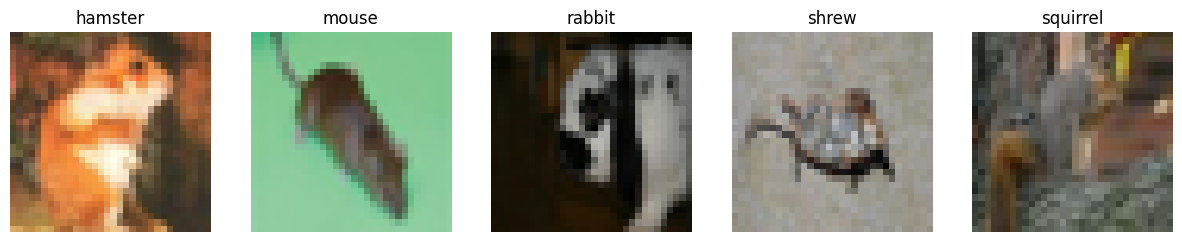

In [50]:
# No. 5

plt.figure(figsize=(15,3))
for i, (nama_kelas, nama_indeks) in enumerate (indeks_small_mammals.items()):
    indeks = np.where(x_label.flatten() == nama_indeks)[0][0]
    plt.subplot(1, len(indeks_small_mammals), i+1)
    plt.imshow(x_train[indeks])
    plt.title(nama_kelas)
    plt.axis("off")
plt.show()

In [51]:
# No. 6

indeks2_small_mammals = [36, 50, 65, 74, 80]

x_train_baru =[]
x_label_baru =[]

for i in indeks2_small_mammals:
    indeks = np.where(x_label == i)[0]
    x_train_baru.append(x_train[indeks])
    x_label_baru.append(x_label[indeks])

x_train_baru = np.concatenate(x_train_baru) #tujuannya untuk menggabungkan dua atau lebih array
x_label_baru = np.concatenate(x_label_baru)

In [52]:
x_train_baru.shape

(2500, 32, 32, 3)

In [53]:
x_label_baru.shape

(2500, 1)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [55]:
# No. 7

x_train_baru = x_train / 255.0
y_test_baru = y_test / 255.0

In [56]:
# No. 8
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

In [57]:
# No. 9
model_rcnn = tf.keras.Sequential([
    tf.keras.layers.Reshape((32, 32, 3), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

No. 10 Penjelasan Mengenai Lapisan (Layer) yang Digunakan pada CNN dan RCNN

Convolutional Neural Networks (CNN):
1.	Lapisan Konvolusi (Convolutional Layer):
•	Bertanggung jawab untuk mengekstrak fitur-fitur dari input gambar dengan melakukan operasi konvolusi.
•	Memiliki sejumlah filter atau kernel yang digeser ke seluruh gambar untuk mendeteksi pola-pola visual.
2.	Lapisan ReLU (Rectified Linear Unit):
•	Menggunakan fungsi aktivasi ReLU untuk menambahkan unsur non-linearitas ke jaringan.
•	Menggantikan nilai-nilai negatif dengan nol, memungkinkan pembelajaran fitur-fitur yang lebih kompleks.
3.	Lapisan Pooling (Pooling Layer):
•	Bertujuan untuk mengurangi dimensi spasial dari fitur peta, mengurangi jumlah parameter dan komputasi.
•	Max pooling atau average pooling dapat digunakan untuk meredam informasi yang kurang relevan.
4.	Lapisan Normalisasi Batch (Batch Normalization Layer):
•	Normalisasi output dari lapisan sebelumnya untuk mempercepat pelatihan dan meningkatkan stabilitas.


Region-based Convolutional Neural Networks (R-CNN):
R-CNN memperluas CNN dengan fokus pada deteksi objek dalam gambar.
1.	Lapisan Proposal Region (Region Proposal Network - RPN):
•	Membuat proposisi wilayah (region proposals) yang kemungkinan mengandung objek.
•	Menggunakan lapisan konvolusi untuk memprediksi proposisi wilayah dan skor kecocokan objek.
2.	Lapisan ROI Pooling atau ROI Align:
•	Mengambil fitur dari proposisi wilayah yang dihasilkan oleh RPN dan mengubahnya ke ukuran yang tetap sebelum memasukkannya ke lapisan berikutnya.
•	Memastikan output tetap berukuran sama tanpa memperhatikan ukuran atau bentuk asli proposisi wilayah.
3.	Lapisan Fully Connected (FC):
•	Digunakan untuk klasifikasi objek dan regresi lokasi objek berdasarkan fitur-fitur yang diperoleh dari proposisi wilayah.
4.	Lapisan Loss:
•	Menyusun fungsi rugi yang mencakup loss untuk klasifikasi dan regresi.
•	Digunakan dalam pelatihan untuk menyesuaikan parameter jaringan.




In [58]:
# No. 11
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(x_train_baru, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 34s 167ms/step - loss: 4.1112 - accuracy: 0.0880
Epoch 2/10
196/196 [==============================] - 31s 160ms/step - loss: 3.4546 - accuracy: 0.1784
Epoch 3/10
196/196 [==============================] - 32s 161ms/step - loss: 3.2826 - accuracy: 0.2097
Epoch 4/10
196/196 [==============================] - 33s 167ms/step - loss: 3.1720 - accuracy: 0.2315
Epoch 5/10
196/196 [==============================] - 33s 166ms/step - loss: 3.0970 - accuracy: 0.2438
Epoch 6/10
196/196 [==============================] - 32s 162ms/step - loss: 3.0399 - accuracy: 0.2558
Epoch 7/10
196/196 [==============================] - 32s 162ms/step - loss: 2.9673 - accuracy: 0.2679
Epoch 8/10
196/196 [==============================] - 33s 170ms/step - loss: 2.9351 - accuracy: 0.2756
Epoch 9/10
196/196 [==============================] - 32s 162ms/step - loss: 2.8866 - accuracy: 0.2833
Epoch 10/10
196/196 [==============================] - 32s 161ms/step - l

In [60]:
# No. 12

model_rcnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_rcnn.fit(x_train_baru, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 34s 168ms/step - loss: 4.3051 - accuracy: 0.0560
Epoch 2/10
196/196 [==============================] - 32s 165ms/step - loss: 3.6977 - accuracy: 0.1395
Epoch 3/10
196/196 [==============================] - 31s 156ms/step - loss: 3.5608 - accuracy: 0.1650
Epoch 4/10
196/196 [==============================] - 34s 173ms/step - loss: 3.4650 - accuracy: 0.1806
Epoch 5/10
196/196 [==============================] - 33s 169ms/step - loss: 3.4110 - accuracy: 0.1900
Epoch 6/10
196/196 [==============================] - 31s 157ms/step - loss: 3.3649 - accuracy: 0.1967
Epoch 7/10
196/196 [==============================] - 37s 190ms/step - loss: 3.3116 - accuracy: 0.2073
Epoch 8/10
196/196 [==============================] - 48s 246ms/step - loss: 3.2836 - accuracy: 0.2134
Epoch 9/10
196/196 [==============================] - 31s 160ms/step - loss: 3.2602 - accuracy: 0.2143
Epoch 10/10
196/196 [==============================] - 32s 163ms/step - l

In [61]:
# No. 13

# Simpan kedua model tersebut
model_cnn.save('model_cnn.h5')
model_rcnn.save('model_rcnn.h5')

# Muat kembali model
loaded_model_cnn = tf.keras.models.load_model('model_cnn.h5')
loaded_model_rcnn = tf.keras.models.load_model('model_rcnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


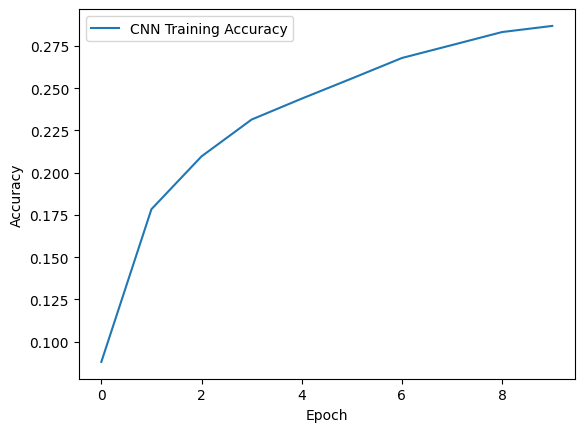

In [62]:
# No. 14
# Plot accuracy berdasarkan model pertama
plt.plot(model_cnn.history.history['accuracy'], label='CNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

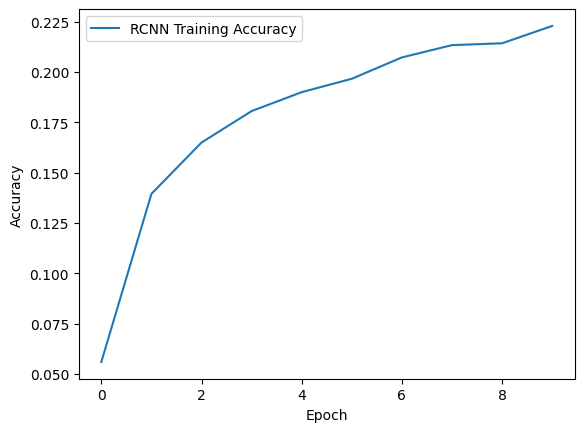

In [63]:
# No. 15
# Plot accuracy berdasarkan model kedua
plt.plot(model_rcnn.history.history['accuracy'], label='RCNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# No. 16

Dari hasil plot accuracy pada data Model yang telah saya jalan kan model pertama (CNN) Memiliki performa yang lebih baik dibandingkan dengan Model kedua (RCNN).